In [157]:
import pandas as pd
import numpy as np

In [158]:
df=pd.read_csv("C:/Users/HP/Downloads/PRDECT-ID Dataset.csv")

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

## Data Understanding

In [160]:
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [161]:
df.shape

(5400, 11)

In [162]:
df.drop(['Location', 'Price', 'Number Sold'], axis=1, inplace=True)

In [163]:
df["Customer Review"].isnull().sum()

0

In [164]:
print(df.duplicated().sum())
# Removing duplicates
df.drop_duplicates(subset=['Customer Review'], keep='first', inplace=True)

9


## Text preprocessing

In [165]:
import re
from nltk.corpus import stopwords

In [166]:
stop_words = set(stopwords.words("indonesian"))
def preprocess_text(text):
    
    text = text.lower()
    
    text = re.sub(r'[^a-z\s]', '', text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df['Customer Review'] = df['Customer Review'].apply(preprocess_text)

In [167]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

## Sentiment Analysis

In [168]:

def get_review_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


# Map ratings to sentiment
def get_rating_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

# Apply sentiment analysis
df['Review_Sentiment'] = df['Customer Review'].apply(get_review_sentiment)
df['Rating_Sentiment'] = df['Overall Rating'].apply(get_rating_sentiment)


# Combine Rating and Review Sentiments
def combined_sentiment(rating_sentiment, review_sentiment):
    # Priority to text sentiment if they match or one is positive
    if rating_sentiment == review_sentiment:
        return rating_sentiment  # Confident match
    elif "Positive" in (rating_sentiment, review_sentiment):
        return "Positive"
    elif "Negative" in (rating_sentiment, review_sentiment):
        return "Negative"
    else:
        return "Neutral"

# Apply combined sentiment function
df['Combined_Sentiment'] = df.apply(lambda row: combined_sentiment(row['Rating_Sentiment'], row['Review_Sentiment']), axis=1)




In [169]:
# Display the results
df[['Overall Rating', 'Customer Review', 'Rating_Sentiment', 'Review_Sentiment', 'Combined_Sentiment']].head(20)

,Overall Rating,Customer Review,Rating_Sentiment,Review_Sentiment,Combined_Sentiment
0,4.9,alhamdulillah berfungsi packaging aman respon ...,Positive,Neutral,Positive
1,4.9,barang bagus respon cepat harga bersaing yg,Positive,Neutral,Positive
2,5.0,barang bagus berfungsi seler ramah pengiriman ...,Positive,Neutral,Positive
3,4.7,bagus sesuai harapan penjual nya ramah trimaka...,Positive,Neutral,Positive
4,4.7,barang bagus pengemasan aman berfungsi,Positive,Neutral,Positive
5,4.7,barang bagus seller ramah,Positive,Neutral,Positive
6,4.9,mantap paten joss,Positive,Neutral,Positive
7,5.0,works fine respon seller cepat barang berfungs...,Positive,Positive,Positive
8,5.0,barang bagus segel utuh original berfungsi ben...,Positive,Positive,Positive
9,4.9,barang berfungsi bagus kali lampu birunya,Positive,Neutral,Positive


## Extract emotion  

In [202]:
# Define emotion keywords in Indonesian mapped to English emotions
emotion_keywords = {
    'happy': [
        'bahagia', 'senang', 'gembira', 'fantastis', 'baik', 'puas',
        'terima kasih', 'ceria', 'manis', 'hebat', 'nyaman', 
        'sukacita', 'berhasil', 'puji', 'menyenangkan',':)' ,'mantap'
    ],
    'love': [
        'cinta', 'suka', 'nikmati', 'menghargai', 'sayang', 'kasih', 
        'rindu', 'peduli', 'romantis', 'menyukai', 'mesra', 'sukarela'
    ],
    'sadness': [
        'sedih', 'kecewa', 'murung', 'menyedihkan', 'putus', 'kehilangan', 
        'malang', 'gelap', 'hampa', 'duka', 'perih', 'air mata', 'tak berdaya'
    ],
    'fear': [
        'takut', 'cemas', 'khawatir', 'terburuk', 'ngeri', 'waspada', 
        'bingung', 'kelam', 'resah', 'gelisah', 'trauma', 'ketakutan'
    ],
    'anger': [
        'marah', 'kesal', 'geram', 'emosi', 'benci', 'jengkel', 
        'putus asa', 'kesal', 'patah hati', 'membara', 'bentrok', 
        'murka', 'menyala', 'mengamuk', 'menyerang'
    ]
}




# Function to extract emotions based on keywords
def extract_emotion(review_text):
    review_text = preprocess_text(review_text)
    found_emotions = set()  # Use a set to avoid duplicates
    for emotion, keywords in emotion_keywords.items():
        for keyword in keywords:
            if keyword in review_text:
                found_emotions.add(emotion)
                break  # Exit the loop once the emotion is found
    return ', '.join(found_emotions) if found_emotions else "Other"


# Apply emotion extraction to the Customer Review column
df['Extracted Emotion'] = df['Customer Review'].apply(extract_emotion)


In [205]:
# Display the results
df[['Customer Review', 'Extracted Emotion']].head()

,Customer Review,Extracted Emotion
0,alhamdulillah berfungsi packaging aman respon ...,Other
1,barang bagus respon cepat harga bersaing yg,Other
2,barang bagus berfungsi seler ramah pengiriman ...,Other
3,bagus sesuai harapan penjual nya ramah trimaka...,love
4,barang bagus pengemasan aman berfungsi,Other


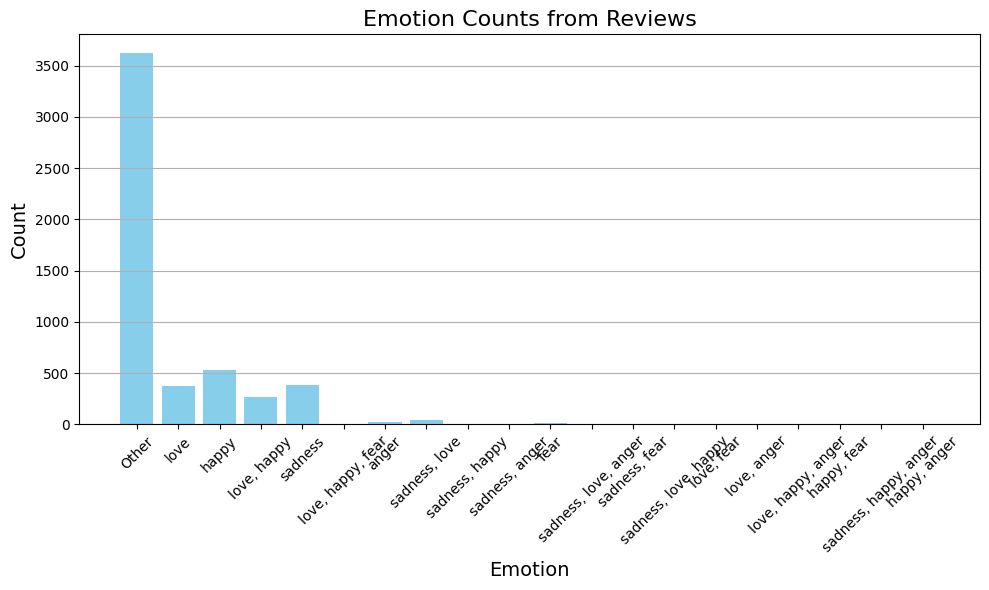

<Figure size 640x480 with 0 Axes>

In [208]:
import matplotlib.pyplot as plt
from collections import Counter
# Step 1: Count the occurrences of each emotion
emotion_counts = Counter(df['Extracted Emotion'])

# Step 2: Create a DataFrame from the counts
df_emotions = pd.DataFrame(emotion_counts.items(), columns=['Emotion', 'Count'])

# Step 3: Visualize the emotion counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_emotions['Emotion'], df_emotions['Count'], color='skyblue')
plt.title('Emotion Counts from Reviews', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Show the plot
plt.tight_layout()
plt.show()